Importing Relevant Packages

In [375]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import rdkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, Fingerprints
import networkx as nx
import torch
import torchvision
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv
from torch_geometric.nn import MessagePassing, global_mean_pool

In [376]:
SMILES_data=pd.read_csv("D://Postdoc-Application/Oxford-Postdoc-TasksSubmission/TASK1-Material_Drug_SMILES.csv", encoding="cp1252")
df = pd.DataFrame(SMILES_data)
print(SMILES_data['drugbank_id'])
#le = preprocessing.LabelEncoder()
print("List of SMILES : ",SMILES_data['SMILES'].unique())
smiles_list = SMILES_data['SMILES']
Drugbank_id_list = SMILES_data['drugbank_id']
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

for i, mol in enumerate(mol_list):
    if mol:
        print(f"SMILES: {smiles_list[i]}")
        print(f"Number of atoms: {mol.GetNumAtoms()}")
        print(f"Number of bonds: {mol.GetNumBonds()}")
        print("-----")
    else:
        print("Invalid SMILES: {smiles_list[i]}")

0        DB00006
1        DB00007
2        DB00014
3        DB00027
4        DB00035
          ...   
11919    DB18706
11920    DB18707
11921    DB18708
11922    DB18709
11923    DB18711
Name: drugbank_id, Length: 11924, dtype: object
List of SMILES :  ['CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)[C@H](CC(O)=O)NC(=O)CNC(=O)[C@H](CC(N)=O)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=O)[C@@H]1CCCN1C(=O)[C@H](N)CC1=CC=CC=C1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCC(O)=O)C(=O)N[C@@H](CCC(O)=O)C(=O)N[C@@H](CC1=CC=C(O)C=C1)C(=O)N[C@@H](CC(C)C)C(O)=O'
 'CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](CC(C)C)NC(=O)[C@H](CC1=CC=C(O)C=C1)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CNC2=C1C=CC=C2)NC(=O)[C@H](CC1=CNC=N1)NC(=O)[C@@H]1CCC(=O)N1'
 'CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H](CC1=CC=C(O)C=C1)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CNC2=CC=CC=C12)NC(=O)[C@H](CC1=CN=CN1)NC(=O)[C@@H]1CCC(=O)N1)C(=O)N[C@@H](CCCN=C(N)N)

[14:12:14] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[14:12:14] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[14:12:14] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'
[14:12:14] Explicit valence for atom # 19 O, 3, is greater than permitted
[14:12:14] Explicit valence for atom # 0 O, 3, is greater than permitted
[14:12:14] Unusual charge on atom 0 number of radical electrons set to zero
[14:12:14] Explicit valence for atom # 4 F, 2, is greater than permitted
[

SMILES: CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)[C@H](CC(O)=O)NC(=O)CNC(=O)[C@H](CC(N)=O)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=O)[C@@H]1CCCN1C(=O)[C@H](N)CC1=CC=CC=C1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCC(O)=O)C(=O)N[C@@H](CCC(O)=O)C(=O)N[C@@H](CC1=CC=C(O)C=C1)C(=O)N[C@@H](CC(C)C)C(O)=O
Number of atoms: 155
Number of bonds: 160
-----
SMILES: CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](CC(C)C)NC(=O)[C@H](CC1=CC=C(O)C=C1)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CNC2=C1C=CC=C2)NC(=O)[C@H](CC1=CNC=N1)NC(=O)[C@@H]1CCC(=O)N1
Number of atoms: 87
Number of bonds: 92
-----
SMILES: CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H](CC1=CC=C(O)C=C1)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CNC2=CC=CC=C12)NC(=O)[C@H](CC1=CN=CN1)NC(=O)[C@@H]1CCC(=O)N1)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@H]1C(=O)NNC(N)=O
Number of atoms: 91
Number of bonds: 96
-----
SMILES: CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(=O)N[C@@H](C)

In [11]:
img = Draw.MolToImage(mol_list[10])
img.show()

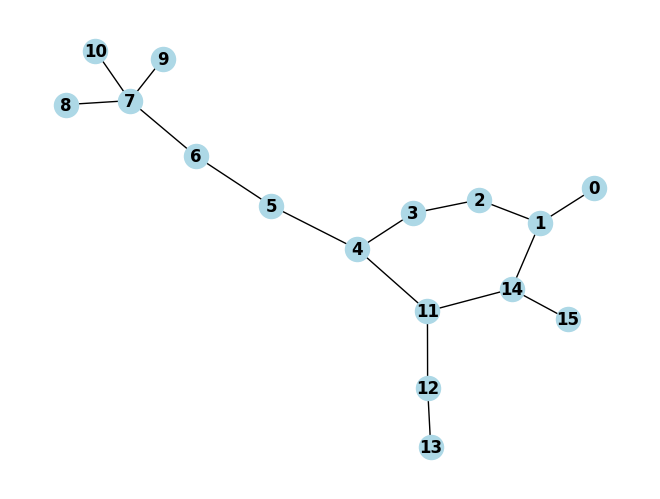

In [377]:
import networkx as nx

graphs = []

for mol in mol_list:
     if mol is not None:
        try:
            G = nx.Graph()
            for atom in mol.GetAtoms():
                G.add_node(atom.GetIdx(), element=atom.GetSymbol())
                atom_idx = atom.GetIdx()
                atom_type = atom.GetSymbol()
                atomic_num = atom.GetAtomicNum()
                degree = atom.GetDegree()
                hybridization = atom.GetHybridization()
                formal_charge = atom.GetFormalCharge()
                is_aromatic = atom.GetIsAromatic()
                implicit_h_count = atom.GetNumImplicitHs()
                isotope = atom.GetIsotope()
    
                atom_data = {'atom_type': atom_type, 'atomic_number': atomic_num, 'degree': degree, 'hybridization': hybridization, 'formal_charge': formal_charge, 'is_aromatic': is_aromatic, 'implicit_h_count': implicit_h_count, 'isotope': isotope}
                G.add_node(atom_idx, **atom_data)
    
            for bond in mol.GetBonds():
                G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond_type=bond.GetBondType())
                atom1_idx = bond.GetBeginAtomIdx()
                atom2_idx = bond.GetEndAtomIdx()
                bond_type = bond.GetBondType()
                is_aromatic = bond.GetIsAromatic()
                
                bond_data = {'bond_type': bond_type, 'is_aromatic': is_aromatic}
                
                bond_dir = bond.GetBondDir()
                if bond_dir != Chem.BondDir.NONE:
                    bond_data['bond_direction'] = bond_dir
                
                bond_order = None
                if bond_type == 1:
                    bond_order = 'single'
                elif bond_type == 2:
                    bond_order = 'double'
                elif bond_type == 3:
                    bond_order = 'triple'
                else:
                    bond_order = 'aromatic' if is_aromatic else 'unknown'
                bond_data = {'bond_type': bond_type, 'is_aromatic': is_aromatic, 'bond_order': bond_order}
                G.add_edge(atom1_idx, atom2_idx, **bond_data)
            
            graphs.append(G)
            
        except ValueError as e:
            print(f"Skipping invalid molecule: {e}")
            

nx.draw(graphs[10], with_labels=True, font_weight='bold', node_color='lightblue')
plt.show()


C:\Miniconda3\envs\myenv\Lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


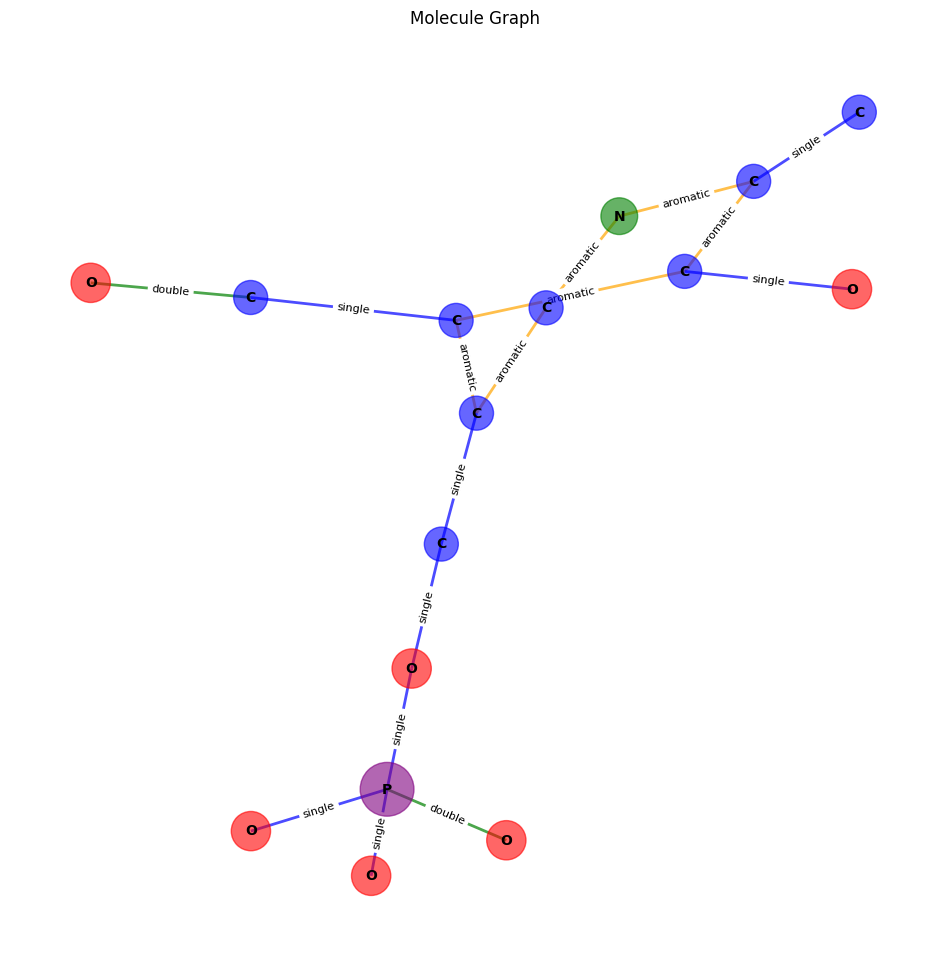

In [378]:
def visualize_graph(G):
    node_labels = {node: G.nodes[node].get('atom_type', '') for node in G.nodes()}
    atom_color_map = {'C': 'blue', 'N': 'green', 'O': 'red', 'H': 'gray', 'P': 'purple', 'S': 'yellow'}
    node_colors = [atom_color_map.get(G.nodes[node].get('atom_type', 'C'), 'gray') for node in G.nodes()]
    node_size = [G.nodes[node].get('atomic_number', 12) * 100 for node in G.nodes()]
    bond_color_map = {'single': 'blue', 'double': 'green', 'triple': 'red', 'aromatic': 'orange', 'unknown': 'gray'}
    edge_labels = {edge: G.edges[edge].get('bond_order', '') for edge in G.edges()}
    edge_colors = [bond_color_map.get(G.edges[edge].get('bond_order', 'unknown'), 'gray') for edge in G.edges()]
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_colors, cmap='Set3', alpha=0.6)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2, alpha=0.7)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.title("Molecule Graph")
    plt.axis('off')
    plt.show()
    
visualize_graph(graphs[10])

In [379]:
def convert_to_pyg_graph(graphs):
    node_features = []
    for _, data in graphs.nodes(data=True):
        feature = [
            data.get('atomic_number', 0),
            int(data.get('is_aromatic', False)),
            data.get('formal_charge', 0),
            data.get('degree', 0)
        ]
        node_features.append(feature)
    x = torch.tensor(node_features, dtype=torch.float)
    edge_index = []
    edge_features = []
    for u, v, data in graphs.edges(data=True):
        edge_index.append((u, v))
        edge_features.append([
            data.get('bond_type', 0),
            int(data.get('is_aromatic', False))
        ])
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()  # Transpose for PyG format
    edge_attr = torch.tensor(edge_features, dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
pyg_graphs = [convert_to_pyg_graph(g) for g in graphs]


Approach 1: Unsupervised Learning (Graph Autoencoder) usin GCN Archtecture

In [381]:
train_graphs, test_graphs = train_test_split(pyg_graphs, test_size=0.3, random_state=42)
graph_loader = DataLoader(pyg_graphs, batch_size=32, shuffle=True)
train_loader = DataLoader(train_graphs, batch_size=102, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=102, shuffle=False)


In [430]:
print(f"Total graphs in DataLoader: {len(graph_loader.dataset)}")

Total graphs in DataLoader: 11914


In [382]:
class GraphAutoencoder_GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(GraphAutoencoder_GCN, self).__init__()
        self.encoder1 = GCNConv(input_dim, hidden_dim)
        self.encoder2 = GCNConv(hidden_dim, latent_dim)
        self.decoder = Linear(latent_dim, input_dim)
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # Encode
        x = F.relu(self.encoder1(x, edge_index))
        latent = self.encoder2(x, edge_index)
        # Decode
        reconstructed = self.decoder(latent)
        return latent, reconstructed

In [392]:
from torch_geometric.loader import DataLoader
model = GraphAutoencoder_GCN(input_dim=4, hidden_dim=186, latent_dim=88)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

model.train()
for epoch in range(50):
    total_loss = 0
    for data in graph_loader:
        optimizer.zero_grad()
        latent, reconstructed = model(data)
        loss = criterion(reconstructed, data.x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 663.6785
Epoch 2, Loss: 552.4883
Epoch 3, Loss: 542.9941
Epoch 4, Loss: 528.9361
Epoch 5, Loss: 516.1154
Epoch 6, Loss: 493.4596
Epoch 7, Loss: 466.6951
Epoch 8, Loss: 458.0042
Epoch 9, Loss: 449.3857
Epoch 10, Loss: 439.4440
Epoch 11, Loss: 424.4415
Epoch 12, Loss: 420.5346
Epoch 13, Loss: 422.9958
Epoch 14, Loss: 420.9772
Epoch 15, Loss: 413.4769
Epoch 16, Loss: 424.7736
Epoch 17, Loss: 405.3365
Epoch 18, Loss: 405.3494
Epoch 19, Loss: 413.9318
Epoch 20, Loss: 408.8105
Epoch 21, Loss: 397.2004
Epoch 22, Loss: 400.3351
Epoch 23, Loss: 404.2804
Epoch 24, Loss: 394.9280
Epoch 25, Loss: 402.1368
Epoch 26, Loss: 398.7942
Epoch 27, Loss: 396.1147
Epoch 28, Loss: 387.9477
Epoch 29, Loss: 391.7596
Epoch 30, Loss: 390.7736
Epoch 31, Loss: 405.0044
Epoch 32, Loss: 388.3327
Epoch 33, Loss: 397.0379
Epoch 34, Loss: 386.1546
Epoch 35, Loss: 391.0539
Epoch 36, Loss: 389.5396
Epoch 37, Loss: 391.9906
Epoch 38, Loss: 395.2999
Epoch 39, Loss: 388.4781
Epoch 40, Loss: 404.3155
Epoch 41,

In [431]:
from torch_geometric.data import Data

graph_data_list = [] 
for idx, graph_data in enumerate(graph_loader.dataset):
    drugbank_id = Drugbank_id_list[idx]
    data = Data(x=graph_data.x, edge_index=graph_data.edge_index, drugbank_id=drugbank_id)
    graph_data_list.append(data)

In [432]:
data = graph_data_list[11912]
print(data.drugbank_id) 

DB18603


In [434]:
print(f"Number of graphs: {len(graph_data_list)}")
print(f"Number of embeddings: {len(embeddings_autoencoder)}")

Number of graphs: 11914
Number of embeddings: 11914


In [449]:
embeddings_array = embeddings_autoencoder.detach().numpy()
Embedding_GCN_df = pd.DataFrame(embeddings_array)
Embedding_GCN_df['Drugbank_ID'] = drugbank_ids
print(Embedding_GCN_df.head())

          0         1         2         3         4         5         6  \
0  0.416419 -0.487842 -0.449281 -0.324244  0.388679  0.473824  0.528826   
1  0.285011 -0.501552 -0.401850 -0.178473  0.306351  0.408230  0.545259   
2  0.364293 -0.457504 -0.386038 -0.269811  0.349075  0.451253  0.473684   
3  0.406661 -0.486886 -0.450362 -0.312744  0.373051  0.472624  0.528131   
4  0.300301 -0.490646 -0.402654 -0.184897  0.310959  0.431218  0.521368   

          7         8         9  ...        79        80        81        82  \
0 -0.278856  0.349705  0.405997  ...  0.389786  0.435143  0.344667 -0.488836   
1 -0.207860  0.371158  0.383191  ...  0.322172  0.391037  0.305407 -0.540460   
2 -0.276036  0.320897  0.376513  ...  0.377176  0.386664  0.335710 -0.419792   
3 -0.266094  0.355875  0.408723  ...  0.368497  0.427176  0.351202 -0.514226   
4 -0.223968  0.373342  0.380251  ...  0.311635  0.383022  0.316720 -0.536620   

         83        84        85        86        87  Drugbank_ID  
0

In [439]:
Embedding_GCN_df.to_csv("D://Postdoc-Application/Oxford-Postdoc-TasksSubmission/PragyaKesarwani_176569/drug_AutoencoderGCN_label.csv", index=False)

In [393]:
embeddings = []
model.eval()
for data in graph_loader:
    with torch.no_grad():
        latent, _ = model(data)
        graph_emb = global_mean_pool(latent, data.batch)
        embeddings.append(graph_emb)
embeddings_autoencoder = torch.cat(embeddings, dim=0)
print("Extracted Embeddings:", embeddings_autoencoder)

Extracted Embeddings: tensor([[ 0.4164, -0.4878, -0.4493,  ...,  0.4122, -0.5797,  0.5696],
        [ 0.2850, -0.5016, -0.4019,  ...,  0.4261, -0.4254,  0.5263],
        [ 0.3643, -0.4575, -0.3860,  ...,  0.3280, -0.5213,  0.5797],
        ...,
        [ 0.3834, -0.4667, -0.4118,  ...,  0.3873, -0.5487,  0.5582],
        [ 0.3530, -0.4473, -0.3859,  ...,  0.3656, -0.4928,  0.5246],
        [ 0.3740, -0.4724, -0.3935,  ...,  0.2879, -0.5463,  0.6231]])


In [394]:
reconstruction_errors = []
for data in test_loader:
    with torch.no_grad():
        latent, reconstructed = model(data)
        loss = F.mse_loss(reconstructed, data.x)
        reconstruction_errors.append(loss.item())

avg_reconstruction_error = sum(reconstruction_errors) / len(reconstruction_errors)
print("Average Reconstruction Error:", avg_reconstruction_error)


Average Reconstruction Error: 1.077898130648666


In [390]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=67)
cluster_labels = kmeans.fit_predict(embeddings_autoencoder.numpy())

silhouette_avg = silhouette_score(embeddings_autoencoder.numpy(), cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.77661866


For n_clusters = 2, the silhouette score is 0.963
For n_clusters = 3, the silhouette score is 0.915
For n_clusters = 4, the silhouette score is 0.405
For n_clusters = 5, the silhouette score is 0.405
For n_clusters = 6, the silhouette score is 0.421
For n_clusters = 7, the silhouette score is 0.305
For n_clusters = 8, the silhouette score is 0.430
For n_clusters = 9, the silhouette score is 0.318


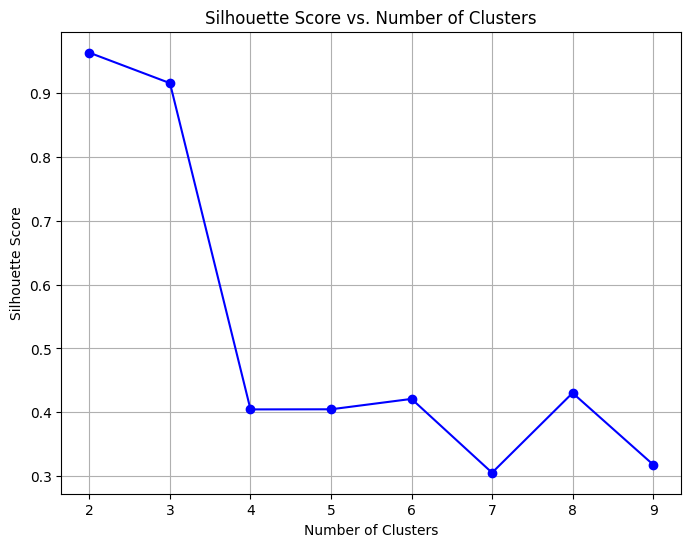

In [391]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings_autoencoder)
    silhouette_avg = silhouette_score(embeddings_autoencoder, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()


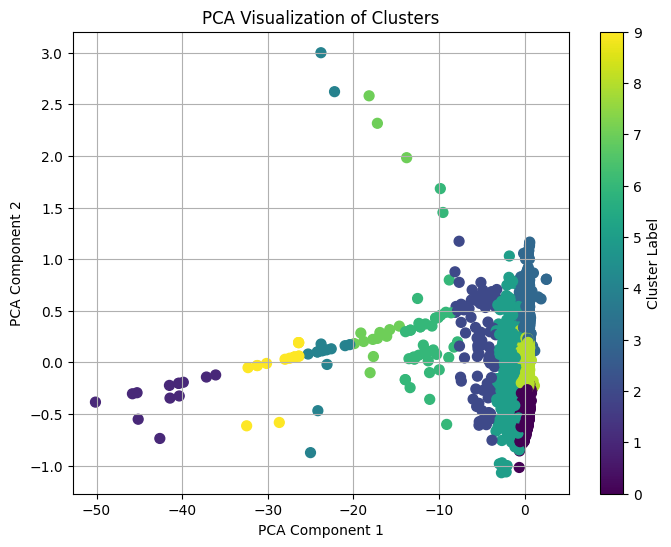

In [388]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_autoencoder)
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_autoencoder)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Silhouette Score: 0.3470


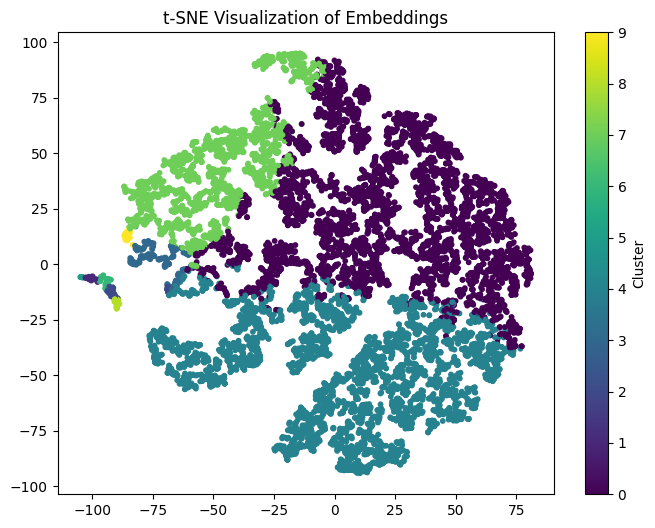

In [389]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(embeddings_GAN)
pseudo_labels = kmeans.labels_
silhouette = silhouette_score(embeddings_GAN, pseudo_labels)
print(f"Silhouette Score: {silhouette:.4f}")
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings_GAN)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=pseudo_labels, cmap="viridis", s=10)
plt.colorbar(label="Cluster")
plt.title("t-SNE Visualization of Embeddings")
plt.show()

Graph Autoencoders utilizing GAN Architecture

In [254]:
class GraphAutoencoder_GAN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(GraphAutoencoder_GAN, self).__init__()
        self.encoder1 = GATConv(input_dim, hidden_dim, heads=4, concat=True)  
        self.encoder2 = GATConv(4 * hidden_dim, hidden_dim, heads=1, concat=False)
        self.encoder3 = GATConv(hidden_dim, latent_dim, heads=1, concat=False)
        self.decoder = Linear(latent_dim, input_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # Encode
        x = F.relu(self.encoder1(x, edge_index))
        x = F.relu(self.encoder2(x, edge_index))
        latent = self.encoder3(x, edge_index)
        # Decode
        reconstructed = self.decoder(latent)
        return latent, reconstructed


In [258]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Dropout
from torch_geometric.nn import GATConv

class GraphAutoencoder_GAN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, dropout_rate=0.3):
        super(GraphAutoencoder_GAN, self).__init__()
        self.encoder1 = GATConv(input_dim, hidden_dim, heads=4, concat=True)  
        self.encoder2 = GATConv(4 * hidden_dim, hidden_dim, heads=1, concat=False)
        self.encoder3 = GATConv(hidden_dim, latent_dim, heads=1, concat=False)
        self.decoder = Linear(latent_dim, input_dim)
        self.dropout = Dropout(p=dropout_rate)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.encoder1(x, edge_index))
        x = self.dropout(x)  
        
        x = F.relu(self.encoder2(x, edge_index))
        x = self.dropout(x)

        latent = self.encoder3(x, edge_index)
        latent = self.dropout(latent)

        # Decode
        reconstructed = self.decoder(latent)
        return latent, reconstructed

In [259]:
modelA = GraphAutoencoder_GAN(input_dim=4, hidden_dim=186, latent_dim=180)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(modelA.parameters(), lr=0.001, weight_decay=1e-4)
criterion = torch.nn.MSELoss()

modelA.train()
for epoch in range(500):
    total_loss = 0
    for data in graph_loader:
        optimizer.zero_grad()
        latent, reconstructed = modelA(data)
        loss = criterion(reconstructed, data.x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 570.0548
Epoch 2, Loss: 391.9692
Epoch 3, Loss: 328.7651
Epoch 4, Loss: 326.3280
Epoch 5, Loss: 302.5244
Epoch 6, Loss: 276.8060
Epoch 7, Loss: 258.5968
Epoch 8, Loss: 259.3271
Epoch 9, Loss: 259.0411
Epoch 10, Loss: 229.9631
Epoch 11, Loss: 216.6055
Epoch 12, Loss: 187.8807
Epoch 13, Loss: 175.2107
Epoch 14, Loss: 171.9730
Epoch 15, Loss: 218.8787
Epoch 16, Loss: 177.7162
Epoch 17, Loss: 163.6688
Epoch 18, Loss: 163.4437
Epoch 19, Loss: 143.2101
Epoch 20, Loss: 159.7508
Epoch 21, Loss: 140.1544
Epoch 22, Loss: 133.7883
Epoch 23, Loss: 141.4050
Epoch 24, Loss: 130.2088
Epoch 25, Loss: 133.4517
Epoch 26, Loss: 123.7012
Epoch 27, Loss: 124.3621
Epoch 28, Loss: 124.2426
Epoch 29, Loss: 119.0166
Epoch 30, Loss: 129.3743
Epoch 31, Loss: 134.4444
Epoch 32, Loss: 114.3406
Epoch 33, Loss: 114.5346
Epoch 34, Loss: 130.7294
Epoch 35, Loss: 208.7561
Epoch 36, Loss: 172.3382
Epoch 37, Loss: 165.7398
Epoch 38, Loss: 160.2655
Epoch 39, Loss: 155.4403
Epoch 40, Loss: 150.4312
Epoch 41,

In [260]:
embeddings = []
modelA.eval()
for data in graph_loader:
    with torch.no_grad():
        latent, _ = modelA(data)
        graph_emb = global_mean_pool(latent, data.batch)
        embeddings.append(graph_emb)
embeddings_GAN = torch.cat(embeddings, dim=0)
print("Extracted Embeddings:", embeddings_GAN)

Extracted Embeddings: tensor([[-9.2645e-02, -8.1104e-02,  1.2728e-01,  ..., -1.4801e-01,
         -7.0904e-02, -7.9990e-02],
        [-1.7822e-02, -1.7806e-02,  4.5260e-02,  ..., -7.1045e-02,
          2.8908e-02, -3.2559e-02],
        [-6.9270e-02,  2.0961e-02,  2.0533e-02,  ..., -4.6486e-03,
          3.7056e-02,  1.8377e-02],
        ...,
        [-3.6476e-02,  6.8309e-04,  1.1464e-02,  ..., -1.6640e-02,
          3.2716e-02,  7.4646e-03],
        [-4.1375e-02,  2.2109e-02, -2.6294e-02,  ...,  2.5533e-04,
          6.5242e-02,  2.8519e-02],
        [-3.3802e-02, -2.1773e-01,  2.3467e-01,  ..., -3.3545e-01,
         -1.5613e-01, -2.0426e-01]])


In [450]:
embeddings_array1 = embeddings_GAN.detach().numpy()
Embedding_GAN_df = pd.DataFrame(embeddings_array1)
Embedding_GAN_df['Drugbank_ID'] = drugbank_ids
print(Embedding_GAN_df.head())

          0         1         2         3         4         5         6  \
0 -0.092645 -0.081104  0.127279 -0.099085 -0.036846  0.101280 -0.162635   
1 -0.017822 -0.017806  0.045260 -0.003837  0.044185  0.012698 -0.072850   
2 -0.069270  0.020961  0.020533 -0.061955  0.045900  0.072181 -0.112013   
3 -0.006393  0.003504 -0.020926  0.052460  0.053465  0.011064  0.035692   
4 -0.006544  0.029076 -0.061067  0.064631  0.063668  0.018230  0.075983   

          7         8         9  ...       171       172       173       174  \
0  0.052931  0.126523  0.119361  ...  0.108326 -0.179053 -0.003862 -0.069982   
1 -0.011489  0.043465  0.021136  ...  0.010640 -0.074787  0.016329 -0.018643   
2 -0.034198  0.017140 -0.004313  ... -0.011991 -0.098629  0.058296  0.017500   
3 -0.031457 -0.023914 -0.016340  ... -0.039141  0.072523  0.019429  0.021957   
4 -0.073030 -0.086244 -0.057580  ... -0.059240  0.145583  0.049398  0.058065   

        175       176       177       178       179  Drugbank_ID  
0

In [441]:
Embedding_GAN_df.to_csv("D://Postdoc-Application/Oxford-Postdoc-TasksSubmission/PragyaKesarwani_176569/drug_AutoencoderGAN_label.csv", index=False)

In [265]:
reconstruction_errors1 = []
for data in test_loader:
    with torch.no_grad():
        latent1, reconstructed1 = modelA(data)
        loss = F.mse_loss(reconstructed1, data.x)
        reconstruction_errors1.append(loss.item())

avg_reconstruction_error1 = sum(reconstruction_errors1) / len(reconstruction_errors1)
print("Average Reconstruction Error:", avg_reconstruction_error1)


Average Reconstruction Error: 0.19868278813858828


In [261]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_GAN = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans_GAN.fit_predict(embeddings_GAN.numpy())
silhouette_avg = silhouette_score(embeddings_GAN.numpy(), cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.46983492


For n_clusters = 2, the silhouette score is 0.945
For n_clusters = 3, the silhouette score is 0.907
For n_clusters = 4, the silhouette score is 0.905
For n_clusters = 5, the silhouette score is 0.470
For n_clusters = 6, the silhouette score is 0.429
For n_clusters = 7, the silhouette score is 0.429
For n_clusters = 8, the silhouette score is 0.340
For n_clusters = 9, the silhouette score is 0.339


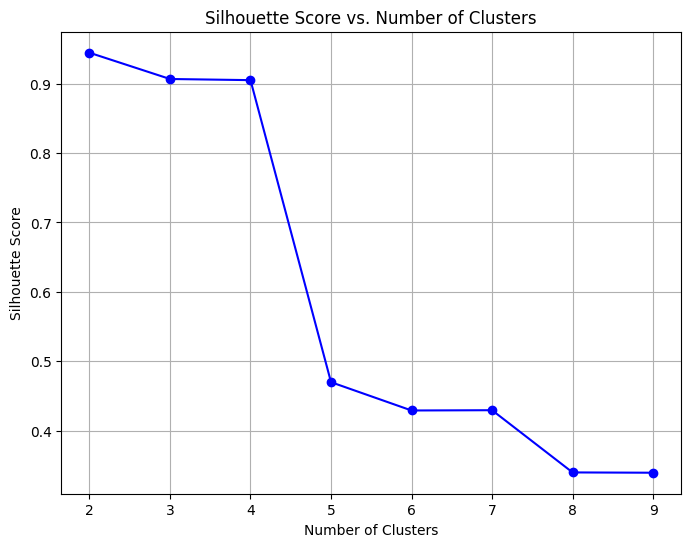

In [262]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores1 = []
for n_clusters in range(2, 10):
    kmeans_GAN = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = kmeans_GAN.fit_predict(embeddings_GAN)
    silhouette_avg1 = silhouette_score(embeddings_GAN, cluster_labels1)
    silhouette_scores1.append(silhouette_avg1)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg1:.3f}")
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores1, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()


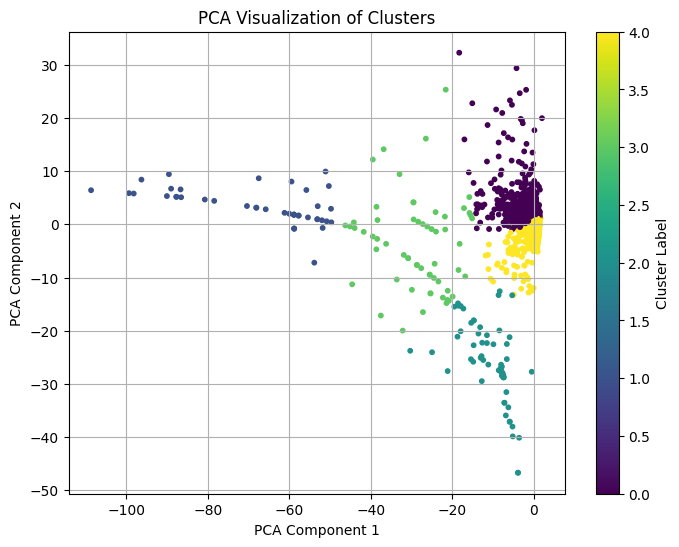

In [263]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
reduced_embeddings1 = pca.fit_transform(embeddings_GAN)
kmeans_GAN = KMeans(n_clusters=5, random_state=42)
cluster_labels1 = kmeans_GAN.fit_predict(embeddings_GAN)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings1[:, 0], reduced_embeddings1[:, 1], c=cluster_labels1, cmap='viridis', s=10)
plt.colorbar(label='Cluster Label')
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Silhouette Score: 0.3470


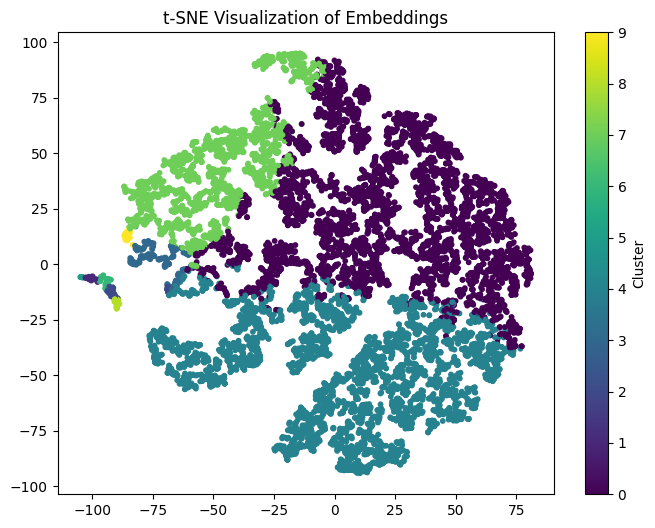

In [269]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(embeddings_GAN)
pseudo_labels = kmeans.labels_
silhouette = silhouette_score(embeddings_GAN, pseudo_labels)
print(f"Silhouette Score: {silhouette:.4f}")

tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings_GAN)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=pseudo_labels, cmap="viridis", s=10)
plt.colorbar(label="Cluster")
plt.title("t-SNE Visualization of Embeddings")
plt.show()

Graph Autoencoders utilizing GIN Architecture

In [271]:
from torch_geometric.nn import GINConv
class GraphAutoencoder_GIN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(GraphAutoencoder_GIN, self).__init__()
        self.encoder1 = GINConv(torch.nn.Sequential(
            torch.nn.Linear(input_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, hidden_dim)
        ))
        self.encoder2 = GINConv(torch.nn.Sequential(
            torch.nn.Linear(hidden_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, latent_dim)
        ))
        self.decoder = Linear(latent_dim, input_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.encoder1(x, edge_index))
        latent = self.encoder2(x, edge_index)
        reconstructed = self.decoder(latent)
        return latent, reconstructed


In [277]:
input_dim = data.x.size(1)
print("Input Dimension:", input_dim)

Input Dimension: 4


In [324]:
modelI = GraphAutoencoder_GIN(input_dim=4, hidden_dim=186, latent_dim=200)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99)
#optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
optimizer = torch.optim.AdamW(modelI.parameters(), lr=0.001, weight_decay=1e-3)
criterion = torch.nn.MSELoss()
criterion1 = torch.nn.L1Loss()
criterion2 = torch.nn.CosineEmbeddingLoss()

modelI.train()
for epoch in range(50):
    total_loss = 0
    for data in graph_loader:
        optimizer.zero_grad()
        latent, reconstructed = modelI(data)
        loss = criterion(reconstructed, data.x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 830.3446
Epoch 2, Loss: 553.6059
Epoch 3, Loss: 591.8775
Epoch 4, Loss: 389.0583
Epoch 5, Loss: 347.4187
Epoch 6, Loss: 387.0303
Epoch 7, Loss: 319.8934
Epoch 8, Loss: 358.5958
Epoch 9, Loss: 339.5682
Epoch 10, Loss: 324.3319
Epoch 11, Loss: 290.5608
Epoch 12, Loss: 301.8995
Epoch 13, Loss: 334.0434
Epoch 14, Loss: 287.9863
Epoch 15, Loss: 301.6956
Epoch 16, Loss: 284.4370
Epoch 17, Loss: 261.4380
Epoch 18, Loss: 249.5003
Epoch 19, Loss: 267.3998
Epoch 20, Loss: 248.2956
Epoch 21, Loss: 237.7249
Epoch 22, Loss: 300.9368
Epoch 23, Loss: 236.5479
Epoch 24, Loss: 232.4675
Epoch 25, Loss: 225.8317
Epoch 26, Loss: 228.0679
Epoch 27, Loss: 252.4977
Epoch 28, Loss: 226.9099
Epoch 29, Loss: 219.8644
Epoch 30, Loss: 238.9605
Epoch 31, Loss: 213.7621
Epoch 32, Loss: 228.5189
Epoch 33, Loss: 220.9546
Epoch 34, Loss: 213.8854
Epoch 35, Loss: 208.6356
Epoch 36, Loss: 209.0233
Epoch 37, Loss: 211.2661
Epoch 38, Loss: 204.5496
Epoch 39, Loss: 215.5608
Epoch 40, Loss: 204.2881
Epoch 41,

In [325]:
embeddings1 = []
modelI.eval()
for data in graph_loader:
    with torch.no_grad():
        latent, _ = modelI(data)
        graph_emb = global_mean_pool(latent, data.batch)
        embeddings1.append(graph_emb)
embeddings_GIN = torch.cat(embeddings1, dim=0)
print("Extracted Embeddings:", embeddings_GIN)

Extracted Embeddings: tensor([[-0.0087, -0.2992, -0.1758,  ...,  0.3164,  0.1688, -0.4057],
        [ 0.0016, -0.2129, -0.0056,  ...,  0.3704,  0.0399, -0.2861],
        [ 0.0062, -0.2621, -0.0577,  ...,  0.4006,  0.1021, -0.3660],
        ...,
        [ 0.0176, -0.3280, -0.0753,  ...,  0.4959,  0.1271, -0.4507],
        [ 0.3192, -0.0407, -0.2689,  ...,  0.4443,  0.0069, -0.5104],
        [-0.0155, -0.2531,  0.0070,  ...,  0.4034,  0.0376, -0.3863]])


In [451]:
embeddings_array2 = embeddings_GIN.detach().numpy()
Embedding_GIN_df = pd.DataFrame(embeddings_array2)
Embedding_GIN_df['Drugbank_ID'] = drugbank_ids
print(Embedding_GIN_df.head())

          0         1         2         3         4         5         6  \
0 -0.008705 -0.299165 -0.175824 -0.110220 -0.054922  1.048923  0.435243   
1  0.001587 -0.212867 -0.005579 -0.050613 -0.016356  0.980237  0.396206   
2  0.006238 -0.262136 -0.057717 -0.065491 -0.028631  0.998607  0.438867   
3  0.003789 -0.229119 -0.070233 -0.023356 -0.047222  1.022689  0.392414   
4 -0.010694 -0.302093 -0.185358 -0.117492 -0.054655  1.043022  0.436831   

          7         8         9  ...       191       192       193       194  \
0  0.047392 -0.153005  0.409765  ...  0.941337 -0.334050  1.023172  0.061625   
1  0.066805 -0.127797  0.389184  ...  1.199389 -0.197531  0.997487  0.108414   
2  0.072511 -0.146566  0.443981  ...  1.145948 -0.303134  1.016272  0.040414   
3  0.061625 -0.109635  0.375851  ...  1.093306 -0.298046  1.031857  0.066673   
4  0.046985 -0.157392  0.407262  ...  0.940199 -0.333331  1.020947  0.060628   

        195       196       197       198       199  Drugbank_ID  
0

In [443]:
Embedding_GIN_df.to_csv("D://Postdoc-Application/Oxford-Postdoc-TasksSubmission/PragyaKesarwani_176569/drug_AutoencoderGIN_label.csv", index=False)

In [326]:
reconstruction_errors2 = []
for data in test_loader:
    with torch.no_grad():
        latent2, reconstructed2 = modelI(data)
        loss = F.mse_loss(reconstructed2, data.x)
        reconstruction_errors2.append(loss.item())

avg_reconstruction_error2 = sum(reconstruction_errors2) / len(reconstruction_errors2)
print("Average Reconstruction Error:", avg_reconstruction_error2)
reconstruction_accuracy = (reconstructed2.argmax(dim=-1) == data.x.argmax(dim=-1)).float().mean().item()
print(f"Reconstruction Accuracy: {reconstruction_accuracy:.4f}")

Average Reconstruction Error: 0.6183775261872344
Reconstruction Accuracy: 1.0000


In [333]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_GIN = KMeans(n_clusters=5, random_state=79)
cluster_labels2 = kmeans_GIN.fit_predict(embeddings_GIN.numpy())
silhouette_avg = silhouette_score(embeddings_GIN.numpy(), cluster_labels2)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.61471266


For n_clusters = 2, the silhouette score is 0.960
For n_clusters = 3, the silhouette score is 0.879
For n_clusters = 4, the silhouette score is 0.848
For n_clusters = 5, the silhouette score is 0.615
For n_clusters = 6, the silhouette score is 0.349
For n_clusters = 7, the silhouette score is 0.366
For n_clusters = 8, the silhouette score is 0.367
For n_clusters = 9, the silhouette score is 0.257


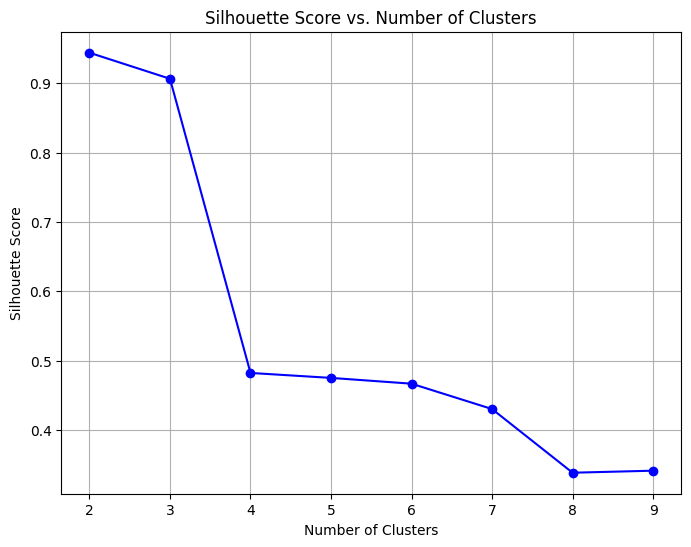

In [336]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores2 = []

for n_clusters in range(2, 10):  # You can adjust the range as needed
    kmeans_GIN = KMeans(n_clusters=n_clusters, random_state=79)
    cluster_labels2 = kmeans_GIN.fit_predict(embeddings_GIN)
    silhouette_avg1 = silhouette_score(embeddings_GIN, cluster_labels2)
    silhouette_scores2.append(silhouette_avg1)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg1:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores1, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 10))  # Ensure the x-axis ticks match the range
plt.grid(True)
plt.show()


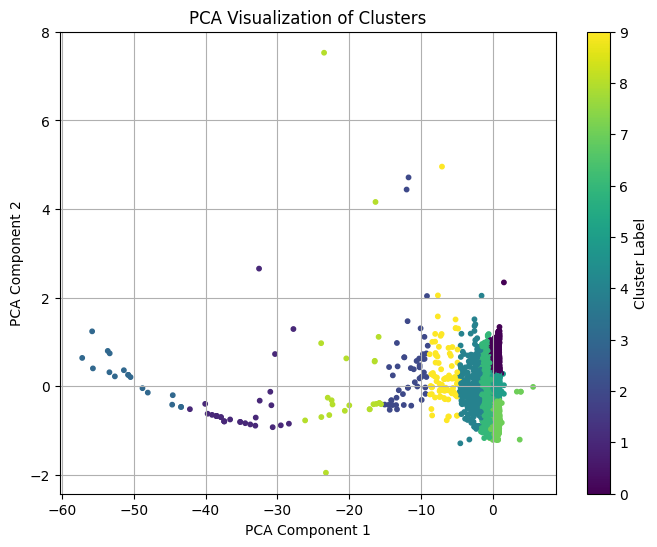

In [337]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
reduced_embeddings2 = pca.fit_transform(embeddings_GIN)
kmeans_GIN = KMeans(n_clusters=10, random_state=79)
cluster_labels2 = kmeans_GIN.fit_predict(embeddings_GIN)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings2[:, 0], reduced_embeddings2[:, 1], c=cluster_labels2, cmap='viridis', s=10)
plt.colorbar(label='Cluster Label')
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Silhouette Score: 0.3502


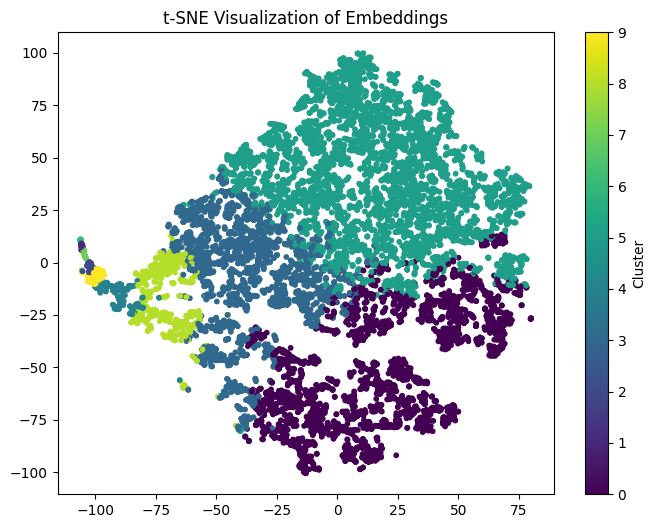

In [338]:
kmeans1 = KMeans(n_clusters=10, random_state=42).fit(embeddings_GIN)
pseudo_labels2 = kmeans1.labels_
silhouette = silhouette_score(embeddings_GIN, pseudo_labels2)
print(f"Silhouette Score: {silhouette:.4f}")
tsne2 = TSNE(n_components=2, random_state=42)
tsne_embeddings2 = tsne2.fit_transform(embeddings_GIN)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embeddings2[:, 0], tsne_embeddings2[:, 1], c=pseudo_labels2, cmap="viridis", s=10)
plt.colorbar(label="Cluster")
plt.title("t-SNE Visualization of Embeddings")
plt.show()

Approach 2: Self-Supervised Learning (Graph Contrastive Learning) utilizing GAN Architecture

In [396]:
modelA = GraphAutoencoder_GAN(input_dim=4, hidden_dim=186, latent_dim=98)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(modelA.parameters(), lr=0.001, weight_decay=1e-4)
criterion = torch.nn.MSELoss()

modelA.train()
for epoch in range(50):
    total_loss = 0
    for data in graph_loader:
        optimizer.zero_grad()
        latent, reconstructed = modelA(data)
        loss = criterion(reconstructed, data.x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 573.0577
Epoch 2, Loss: 391.4433
Epoch 3, Loss: 345.1626
Epoch 4, Loss: 318.0960
Epoch 5, Loss: 312.0695
Epoch 6, Loss: 337.0877
Epoch 7, Loss: 310.4507
Epoch 8, Loss: 260.9808
Epoch 9, Loss: 241.3775
Epoch 10, Loss: 228.3502
Epoch 11, Loss: 223.1219
Epoch 12, Loss: 230.4699
Epoch 13, Loss: 211.7873
Epoch 14, Loss: 214.6998
Epoch 15, Loss: 207.0477
Epoch 16, Loss: 196.6112
Epoch 17, Loss: 178.9765
Epoch 18, Loss: 170.2021
Epoch 19, Loss: 174.8140
Epoch 20, Loss: 165.6593
Epoch 21, Loss: 148.7574
Epoch 22, Loss: 141.5061
Epoch 23, Loss: 161.2770
Epoch 24, Loss: 150.0598
Epoch 25, Loss: 139.6998
Epoch 26, Loss: 129.6857
Epoch 27, Loss: 136.5683
Epoch 28, Loss: 129.7315
Epoch 29, Loss: 128.2341
Epoch 30, Loss: 125.3530
Epoch 31, Loss: 113.7116
Epoch 32, Loss: 138.5907
Epoch 33, Loss: 145.2812
Epoch 34, Loss: 124.9478
Epoch 35, Loss: 121.9163
Epoch 36, Loss: 113.8957
Epoch 37, Loss: 125.2859
Epoch 38, Loss: 110.5372
Epoch 39, Loss: 128.7418
Epoch 40, Loss: 144.8442
Epoch 41,

In [407]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import global_mean_pool
all_embeddings = []
def augment_graph(data, drop_prob=0.2):
    edge_index = data.edge_index
    num_edges = edge_index.size(1)
    mask = torch.rand(num_edges) > drop_prob
    data.edge_index = edge_index[:, mask]
    return data

def contrastive_loss(emb1, emb2, tau=0.5):
    sim_matrix = torch.matmul(emb1, emb2.T) / tau
    labels = torch.arange(emb1.size(0))
    return F.cross_entropy(sim_matrix, labels)

#Attention model defined above is used here
#optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10):
    modelA.train()
    total_loss = 0
    total_reconstruction_error = 0 
    
    for data in graph_loader: 
        data_aug1 = augment_graph(data.clone())
        data_aug2 = augment_graph(data.clone())
        emb1, reconstructed1 = modelA(data_aug1)
        emb2, reconstructed2 = modelA(data_aug2)
        emb1_graph = global_mean_pool(emb1, data_aug1.batch)
        emb2_graph = global_mean_pool(emb2, data_aug2.batch)
        loss = contrastive_loss(emb1_graph, emb2_graph)
        reconstruction_error1 = F.mse_loss(reconstructed1, data_aug1.x)
        reconstruction_error2 = F.mse_loss(reconstructed2, data_aug2.x)
        total_reconstruction_error += (reconstruction_error1.item() + reconstruction_error2.item()) / 2
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        all_embeddings.append(emb1_graph.detach().cpu())
    avg_reconstruction_error = total_reconstruction_error / len(graph_loader)
    print(f"Epoch {epoch + 1}, Total Loss: {total_loss:.4f}, Avg Reconstruction Error: {avg_reconstruction_error:.4f}")
final_embeddings = torch.cat(all_embeddings, dim=0)

Epoch 1, Total Loss: 492.4089, Avg Reconstruction Error: 3.7841
Epoch 2, Total Loss: 490.6996, Avg Reconstruction Error: 3.8245
Epoch 3, Total Loss: 489.5755, Avg Reconstruction Error: 3.8123
Epoch 4, Total Loss: 460.4409, Avg Reconstruction Error: 3.8315
Epoch 5, Total Loss: 462.0979, Avg Reconstruction Error: 3.8744
Epoch 6, Total Loss: 454.5853, Avg Reconstruction Error: 3.8513
Epoch 7, Total Loss: 450.3185, Avg Reconstruction Error: 3.7730
Epoch 8, Total Loss: 446.5232, Avg Reconstruction Error: 3.8103
Epoch 9, Total Loss: 446.1526, Avg Reconstruction Error: 3.9008
Epoch 10, Total Loss: 449.1880, Avg Reconstruction Error: 3.8528


In [403]:
from torchviz import make_dot
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dummy_data = graph_loader.dataset[0]
dummy_data = dummy_data.to(device)
embeddings, reconstruction = modelA(dummy_data)
#make_dot((embeddings, reconstruction), params=dict(modelA.named_parameters())).render("model_architecture", format="png")

In [408]:
embeddings_Contrastive = final_embeddings
print(embeddings_Contrastive)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(embeddings_Contrastive)

sil_score = silhouette_score(embeddings_Contrastive, labels)
print(f"Silhouette Score: {sil_score:.4f}")

tensor([[-0.1253, -0.0974, -0.0208,  ...,  0.1858, -0.0553, -0.1101],
        [-0.0580,  0.0651,  0.2542,  ..., -0.2714, -0.2886, -0.1117],
        [-0.1586, -0.0138, -0.0792,  ..., -0.1718, -0.2551, -0.3322],
        ...,
        [ 0.1016, -0.2246,  0.0179,  ..., -0.1235, -0.2966, -0.6525],
        [ 0.6735, -0.1372, -0.1800,  ...,  0.1998, -0.0763,  0.1493],
        [-0.0991, -0.1292, -0.0972,  ..., -0.0242,  0.2884,  0.1672]])
Silhouette Score: 0.1026


For n_clusters = 2, the silhouette score is 0.111
For n_clusters = 3, the silhouette score is 0.103
For n_clusters = 4, the silhouette score is 0.082
For n_clusters = 5, the silhouette score is 0.085
For n_clusters = 6, the silhouette score is 0.079
For n_clusters = 7, the silhouette score is 0.077
For n_clusters = 8, the silhouette score is 0.081
For n_clusters = 9, the silhouette score is 0.077


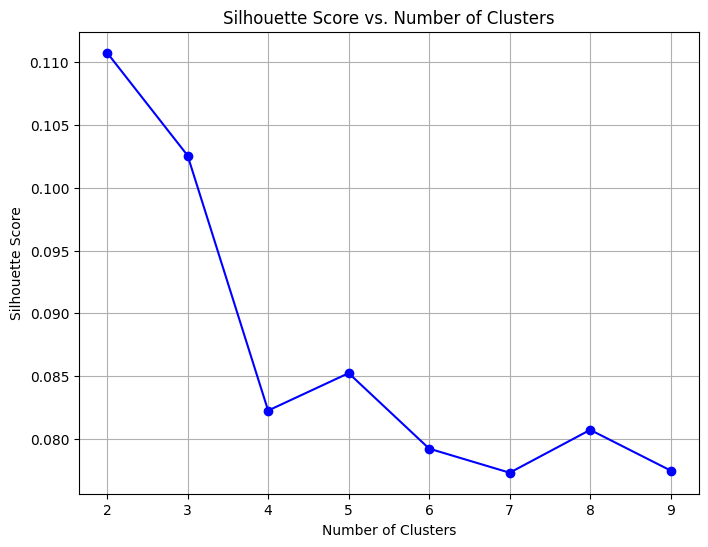

In [409]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores3 = []

for n_clusters in range(2, 10):  # You can adjust the range as needed
    kmeans_Contrastive = KMeans(n_clusters=n_clusters, random_state=79)
    cluster_labels3 = kmeans_Contrastive.fit_predict(embeddings_Contrastive)
    silhouette_avg3 = silhouette_score(embeddings_Contrastive, cluster_labels3)
    silhouette_scores3.append(silhouette_avg3)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg3:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores3, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 10))  # Ensure the x-axis ticks match the range
plt.grid(True)
plt.show()

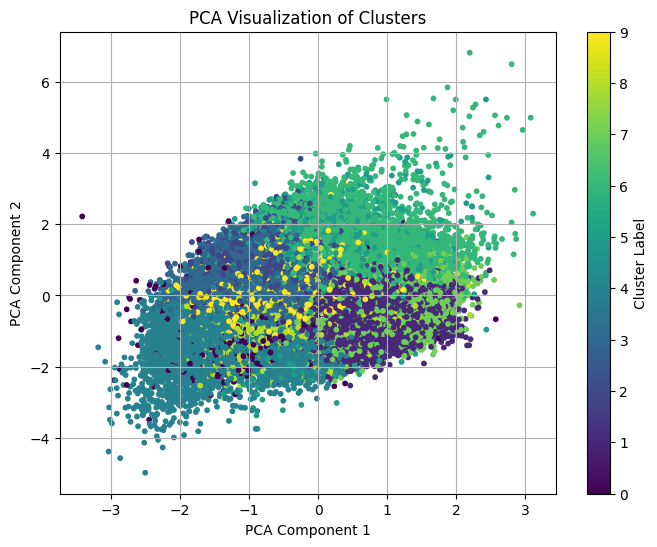

In [410]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
reduced_embeddings3 = pca.fit_transform(embeddings_Contrastive)
kmeans_Contrastive = KMeans(n_clusters=10, random_state=79)
cluster_labels3 = kmeans_Contrastive.fit_predict(embeddings_Contrastive)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings3[:, 0], reduced_embeddings3[:, 1], c=cluster_labels3, cmap='viridis', s=10)
plt.colorbar(label='Cluster Label')
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Silhouette Score: 0.0685


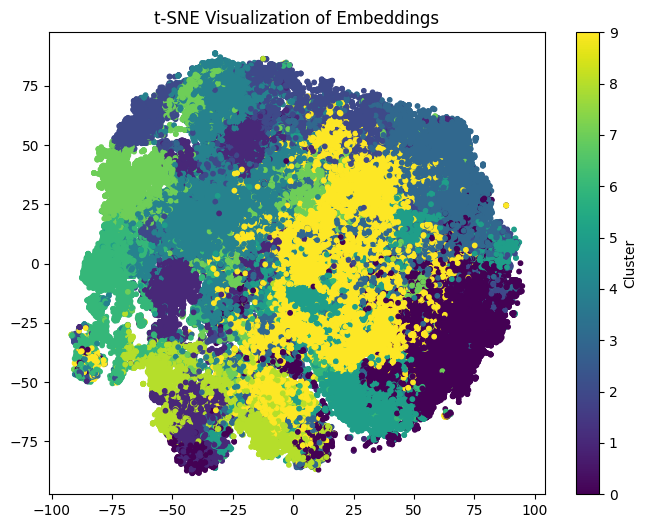

In [411]:
kmeans3 = KMeans(n_clusters=10, random_state=42).fit(embeddings_Contrastive)
pseudo_labels3 = kmeans3.labels_

silhouette3 = silhouette_score(embeddings_Contrastive, pseudo_labels3)
print(f"Silhouette Score: {silhouette3:.4f}")

tsne3 = TSNE(n_components=2, random_state=42)
tsne_embeddings3 = tsne3.fit_transform(embeddings_Contrastive)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embeddings3[:, 0], tsne_embeddings3[:, 1], c=pseudo_labels3, cmap="viridis", s=10)
plt.colorbar(label="Cluster")
plt.title("t-SNE Visualization of Embeddings")
plt.show()

In [465]:
embeddings_tensor = torch.tensor(embeddings_array)
embeddings_tensor1 = torch.tensor(embeddings_array1)
embeddings_tensor2 = torch.tensor(embeddings_array2)
combined_embeddings = torch.cat([embeddings_tensor, embeddings_tensor1, embeddings_tensor2], dim=1)

embedding_columns = ([f"Feature_AutoencoderGCN_{i}" for i in range(embeddings_tensor.size(1))] +
                     [f"Feature_AutoencoderGAN_{i}" for i in range(embeddings_tensor1.size(1))] +
                     [f"Feature_AutoencoderGIN_{i}" for i in range(embeddings_tensor2.size(1))])

AllEmbeddings_df = pd.DataFrame(combined_embeddings.cpu().numpy(), columns=embedding_columns)

AllEmbeddings_df['DrugBank_ID'] = drugbank_ids 
print(AllEmbeddings_df.head())

   Feature_AutoencoderGCN_0  Feature_AutoencoderGCN_1  \
0                  0.416419                 -0.487842   
1                  0.285011                 -0.501552   
2                  0.364293                 -0.457504   
3                  0.406661                 -0.486886   
4                  0.300301                 -0.490646   

   Feature_AutoencoderGCN_2  Feature_AutoencoderGCN_3  \
0                 -0.449281                 -0.324244   
1                 -0.401850                 -0.178473   
2                 -0.386038                 -0.269811   
3                 -0.450362                 -0.312744   
4                 -0.402654                 -0.184897   

   Feature_AutoencoderGCN_4  Feature_AutoencoderGCN_5  \
0                  0.388679                  0.473824   
1                  0.306351                  0.408230   
2                  0.349075                  0.451253   
3                  0.373051                  0.472624   
4                  0.310959  

In [454]:
AllEmbeddings_df.to_csv("D://Postdoc-Application/Oxford-Postdoc-TasksSubmission/PragyaKesarwani_176569/drug_AutoencoderGCN-GAN-GIN_label.csv", index=False)

For n_clusters = 2, the silhouette score is 0.919
For n_clusters = 3, the silhouette score is 0.893
For n_clusters = 4, the silhouette score is 0.332
For n_clusters = 5, the silhouette score is 0.434
For n_clusters = 6, the silhouette score is 0.361
For n_clusters = 7, the silhouette score is 0.360
For n_clusters = 8, the silhouette score is 0.341
For n_clusters = 9, the silhouette score is 0.296


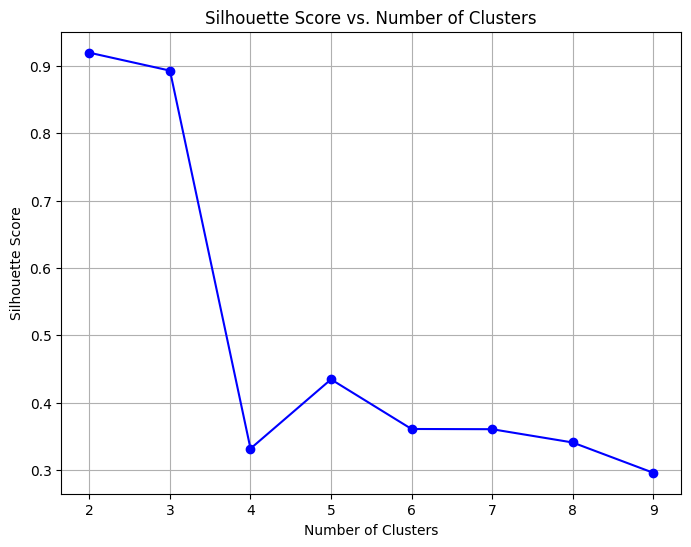

In [456]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores4 = []

for n_clusters in range(2, 10):  # You can adjust the range as needed
    kmeans_combined = KMeans(n_clusters=n_clusters, random_state=79)
    cluster_labels4 = kmeans_combined.fit_predict(combined_embeddings)
    silhouette_avg4 = silhouette_score(combined_embeddings, cluster_labels4)
    silhouette_scores4.append(silhouette_avg4)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg4:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores4, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()

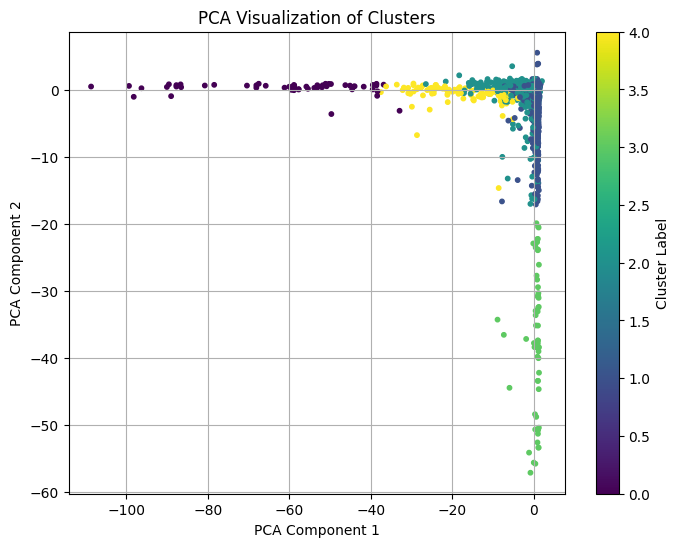

In [459]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
reduced_embeddings4 = pca.fit_transform(combined_embeddings)
kmeans_combined = KMeans(n_clusters=5, random_state=79)
cluster_labels4 = kmeans_combined.fit_predict(combined_embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings4[:, 0], reduced_embeddings4[:, 1], c=cluster_labels4, cmap='viridis', s=10)
plt.colorbar(label='Cluster Label')
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Silhouette Score: 0.3091


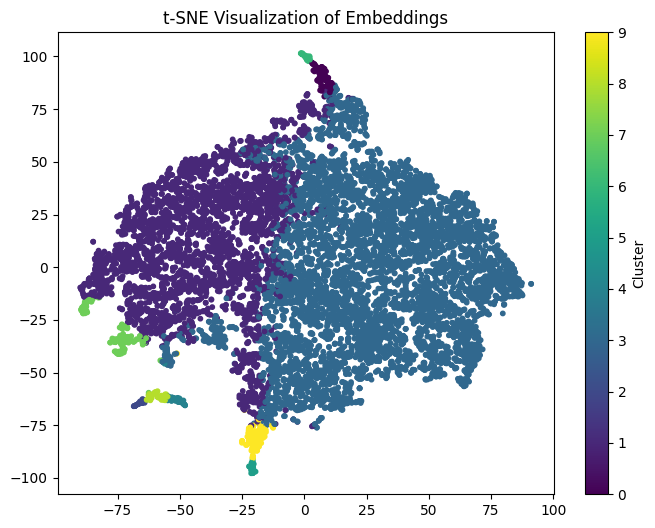

In [460]:
kmeans_combined = KMeans(n_clusters=10, random_state=42).fit(combined_embeddings)
pseudo_labels4 = kmeans_combined.labels_

silhouette = silhouette_score(combined_embeddings, pseudo_labels4)
print(f"Silhouette Score: {silhouette:.4f}")
tsne4 = TSNE(n_components=2, random_state=42)
tsne_embeddings4 = tsne4.fit_transform(combined_embeddings)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embeddings4[:, 0], tsne_embeddings4[:, 1], c=pseudo_labels4, cmap="viridis", s=10)
plt.colorbar(label="Cluster")
plt.title("t-SNE Visualization of Embeddings")
plt.show()

Calculate Physicochemical Descriptors

In [461]:
def calculate_all_descriptors(smiles, drugbank_id):
    from rdkit import Chem
    from rdkit.Chem import Descriptors, Crippen, rdMolDescriptors, EState
    from rdkit.Chem.Fragments import fr_Al_OH, fr_Ar_N, fr_COO, fr_ketone, fr_ether
    
    mol = Chem.MolFromSmiles(smiles)
    descriptors = {}
    default_value = 0.0

    if mol is None:
        print(f"Invalid SMILES: {smiles}")
        descriptors = {key: default_value for key in descriptors.keys()}
        descriptors['DrugBank_ID'] = drugbank_id
        return descriptors

    try:
        descriptors['MolecularWeight'] = Descriptors.MolWt(mol)
        descriptors['LogP'] = Crippen.MolLogP(mol)
        descriptors['NumHDonors'] = Descriptors.NumHDonors(mol)
        descriptors['NumHAcceptors'] = Descriptors.NumHAcceptors(mol)
        descriptors['TPSA'] = Descriptors.TPSA(mol)
        descriptors['FractionCSP3'] = Descriptors.FractionCSP3(mol)
        descriptors['HeavyAtomCount'] = Descriptors.HeavyAtomCount(mol)
        descriptors['NHOHCount'] = Descriptors.NHOHCount(mol)
        descriptors['NOCount'] = Descriptors.NOCount(mol)
        descriptors['MolMR'] = Descriptors.MolMR(mol)
    except Exception as e:
        print(f"Error calculating basic molecular properties for {smiles}: {e}")
        for key in ['MolecularWeight', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 
                    'FractionCSP3', 'HeavyAtomCount', 'NHOHCount', 'NOCount', 'MolMR']:
            descriptors[key] = default_value

    try:
        descriptors['Chi0'] = Descriptors.Chi0(mol)
        descriptors['Chi1'] = Descriptors.Chi1(mol)
        descriptors['HallKierAlpha'] = Descriptors.HallKierAlpha(mol)
    except Exception as e:
        print(f"Error calculating structural descriptors for {smiles}: {e}")
        for key in ['Chi0', 'Chi1', 'HallKierAlpha']:
            descriptors[key] = default_value

    try:
        for i in range(1, 15):
            descriptors[f'PEOE_VSA{i}'] = rdMolDescriptors.PEOE_VSA_(mol)[i - 1]
        for i in range(1, 13):
            descriptors[f'SlogP_VSA{i}'] = rdMolDescriptors.SlogP_VSA_(mol)[i - 1]
    except Exception as e:
        print(f"Error calculating electrostatic descriptors for {smiles}: {e}")
        for i in range(1, 15):
            descriptors[f'PEOE_VSA{i}'] = default_value
        for i in range(1, 13):
            descriptors[f'SlogP_VSA{i}'] = default_value

    try:
        descriptors['BalabanJ'] = Descriptors.BalabanJ(mol)
        descriptors['Kappa1'] = Descriptors.Kappa1(mol)
        descriptors['Kappa2'] = Descriptors.Kappa2(mol)
        descriptors['Kappa3'] = Descriptors.Kappa3(mol)
    except Exception as e:
        print(f"Error calculating 3D geometry descriptors for {smiles}: {e}")
        for key in ['BalabanJ', 'Kappa1', 'Kappa2', 'Kappa3']:
            descriptors[key] = default_value

    try:
        descriptors['BertzCT'] = Descriptors.BertzCT(mol)
        descriptors['Ipc'] = Descriptors.Ipc(mol)
    except Exception as e:
        print(f"Error calculating topological descriptors for {smiles}: {e}")
        for key in ['BertzCT', 'Ipc']:
            descriptors[key] = default_value

    try:
        for i in range(1, 12):
            descriptors[f'EState_{i}'] = EState.EStateIndices(mol)[i - 1]
        for i in range(1, 12):
            descriptors[f'EState_VSA{i}'] = EState.EState_VSA(mol)[i - 1]
    except Exception as e:
        print(f"Error calculating E-State descriptors for {smiles}: {e}")
        for i in range(1, 12):
            descriptors[f'EState_{i}'] = default_value
        for i in range(1, 12):
            descriptors[f'EState_VSA{i}'] = default_value

    try:
        functional_groups = {
            'Alcohol': fr_Al_OH(mol),
            'AromaticRing': fr_Ar_N(mol),
            'CarboxylicAcid': fr_COO(mol),
            'Ketone': fr_ketone(mol),
            'Ether': fr_ether(mol),
        }
        descriptors.update(functional_groups)
    except Exception as e:
        print(f"Error calculating functional groups for {smiles}: {e}")
        for key in ['Alcohol', 'AromaticRing', 'CarboxylicAcid', 'Ketone', 'Ether']:
            descriptors[key] = default_value
    descriptors['DrugBank_ID'] = drugbank_id
    return descriptors


In [462]:
descriptor_data = []
for smiles, drugbank_id in zip(smiles_list, Drugbank_id_list):
    descriptor_data.append(calculate_all_descriptors(smiles, drugbank_id))
Physicochemical_df = pd.DataFrame(descriptor_data)
print(Physicochemical_df)
print(Physicochemical_df.shape)
print(Physicochemical_df.head())

Error calculating E-State descriptors for CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)[C@H](CC(O)=O)NC(=O)CNC(=O)[C@H](CC(N)=O)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=O)[C@@H]1CCCN1C(=O)[C@H](N)CC1=CC=CC=C1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCC(O)=O)C(=O)N[C@@H](CCC(O)=O)C(=O)N[C@@H](CC1=CC=C(O)C=C1)C(=O)N[C@@H](CC(C)C)C(O)=O: 'module' object is not callable
Error calculating E-State descriptors for CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](CC(C)C)NC(=O)[C@H](CC1=CC=C(O)C=C1)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CNC2=C1C=CC=C2)NC(=O)[C@H](CC1=CNC=N1)NC(=O)[C@@H]1CCC(=O)N1: 'module' object is not callable
Error calculating E-State descriptors for CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H](CC1=CC=C(O)C=C1)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CNC2=CC=CC=C12)NC(=O)[C@H](CC1=CN=CN1)NC(=O)[C@@H]1CCC(=O)N1)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@H]1C(=O)NNC(N)=O: 'module' object is not callable
Error 

[19:24:44] Explicit valence for atom # 13 Cl, 5, is greater than permitted


Error calculating E-State descriptors for COC1=CC=C(CNC(=O)NC2=NC=C(S2)[N+]([O-])=O)C=C1: 'module' object is not callable
Error calculating E-State descriptors for [H][C@]1(CCCN1C(=O)C(=O)C(C)(C)CC)C(=O)OCCCC1=CN=CC=C1: 'module' object is not callable
Error calculating E-State descriptors for N1C=NC2=C1N=CN1C=CN=C21: 'module' object is not callable
Error calculating E-State descriptors for C(CC1=CC=NC=C1)C1=CNC2=CC=CC=C12: 'module' object is not callable
Error calculating E-State descriptors for COC1=C(OC2CCCC2)C=C(C=C1)C1CNC(=O)C1: 'module' object is not callable
Error calculating E-State descriptors for OCCCCO: index 6 is out of bounds for axis 0 with size 6
Error calculating E-State descriptors for NCCS(O)(=O)=O: index 7 is out of bounds for axis 0 with size 7
Error calculating E-State descriptors for OC1=CC=CC(Cl)=C1: index 8 is out of bounds for axis 0 with size 8
Error calculating E-State descriptors for CC(C)(C)C1=CC=C(SC2=CC=CC3=C2C(N)=NC(N)=N3)C=C1: 'module' object is not call

[19:24:45] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[19:24:45] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'


Error calculating E-State descriptors for CC(C)(C)NC(=O)[C@@H]1CN(CC2=CC3=C(O2)C=CC=C3)CCN1C[C@@H](O)C[C@@H](CC1=CC=CC=C1)C(=O)NC1[C@H](O)CC2=C1C=CC=C2: 'module' object is not callable
Error calculating E-State descriptors for [H][C@]1(C[C@@]2([H])O[C@](C)(N3C4=CC=CC=C4C4=C5CNC(=O)C5=C5C6=CC=CC=C6N2C5=C34)[C@]1([H])OC)NC: 'module' object is not callable
Error calculating E-State descriptors for N[C@@H](CCCNC(=O)CP(O)(O)=O)C(O)=O: 'module' object is not callable
Error calculating E-State descriptors for O.[Fe].[Fe].[N-]=[N+]=[N-]: index 6 is out of bounds for axis 0 with size 6
Error calculating E-State descriptors for COC(=O)C1=C(O)C=CC=C1OC\C=C\C1=CC(C2=CC(=NO2)C(O)=O)=C(F)C=C1: 'module' object is not callable
Error calculating E-State descriptors for NC1=NC2=C(N=C(CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(O)=O)C(O)=O)CN2)C(=O)N1: 'module' object is not callable
Error calculating E-State descriptors for CN(CCCCCCOC1=CC=C(C(=O)C2=CC=C(Br)C=C2)C(F)=C1)CC=C: 'module' object is not callable
Error c

[19:24:49] Explicit valence for atom # 19 O, 3, is greater than permitted


Error calculating E-State descriptors for [H][C@]1(CC2=CC=CC=C2)N(CC2=CC(=CC=C2)C(=O)NC2=NC=CS2)C(=O)N(CC2=CC(=CC=C2)C(=O)NC2=NC=CS2)[C@]([H])(CC2=CC=CC=C2)[C@]([H])(O)[C@@]1([H])O: 'module' object is not callable
Error calculating E-State descriptors for [H][C@@]12C[C@@H](O)[C@@]3([H])[C@@]4(C)CC[C@@H](O)[C@@H](C)[C@]4([H])CC[C@]3(C)[C@@]1(C)C[C@H](OC(C)=O)\C2=C(\CCC=C(C)C)C(O)=O: 'module' object is not callable
Error calculating E-State descriptors for O[C@@H]([C@H](O)[C@@H](CCC1=CC=CC=C1)C(=O)N[C@@H]1[C@H](O)CC2=C1C=CC=C2)[C@@H](CCC1=CC=CC=C1)C(=O)N[C@@H]1[C@H](O)CC2=C1C=CC=C2: 'module' object is not callable
Error calculating E-State descriptors for [H][C@]1(NCCC2=C1C=C(NC(=O)C1=CC=C3C=C(C=CC3=C1)C(N)=N)C=C2)C(C)C: 'module' object is not callable
Error calculating E-State descriptors for [H][C@](CS)(CCC1=CC=CC=C1)C(=O)N=C(C(O)=O)C1=CC=C(CN2C=NN=N2)S1: 'module' object is not callable
Error calculating E-State descriptors for CCCCCO[P@](O)(=O)OP(O)(O)=O: 'module' object is not callab

[19:25:00] Explicit valence for atom # 0 O, 3, is greater than permitted


Error calculating E-State descriptors for CNC(CC(C)C)C(=O)NC1C(O)C2=CC=C(OC3=C(OC4OC(CO)C(O)C(O)C4O)C4=CC(=C3)C(NC(=O)C(CC(N)=O)NC1=O)C(=O)NC1C3=CC=C(O)C(=C3)C3=C(C=C(O)C=C3O)C(NC(=O)C(NC1=O)C(OC1CC(C)(N)C(=O)C(C)O1)C1=CC(Cl)=C(O4)C=C1)C(O)=O)C(Cl)=C2: 'module' object is not callable
Error calculating E-State descriptors for [H]N([C@H](COCCCCCCCCCCCCCCCCCC)COP(O)(=O)OCCSC)C(C)=O: 'module' object is not callable
Error calculating E-State descriptors for [H]C(=O)N1CCCCC1: index 8 is out of bounds for axis 0 with size 8
Error calculating E-State descriptors for [H][C@]12CC3=C(C(N)=C4C=CC(Cl)=CC4=N3)[C@]([H])(CC(CC)=C1)C2: 'module' object is not callable
Error calculating E-State descriptors for COC1=CC=C2C=C3C4=CC5=C(OCO5)C=C4CC[N+]3=CC2=C1OC: 'module' object is not callable
Error calculating E-State descriptors for OC[C@H]1O[C@@H](OC[C@H]2OC(O)[C@H](O)[C@@H](O)[C@@H]2O)[C@H](O)[C@@H](O)[C@H]1O: 'module' object is not callable
Error calculating E-State descriptors for [H]N([H])C1=C2N=CN([

[19:25:01] Unusual charge on atom 0 number of radical electrons set to zero


Error calculating E-State descriptors for [H]N([H])C1=NC(=O)C2=C(C=CC(C[C@@H](C(O)=O)C3=CC=C(C=C3)C(=O)N([H])[C@@H](CCC(O)=O)C(O)=O)=C2)N1[H]: 'module' object is not callable
Error calculating E-State descriptors for CC(=O)N[C@@H]1[C@@H](O)C[C@](O)(O[C@H]1[C@H](O)[C@H](O)CO)C(O)=O: 'module' object is not callable
Error calculating E-State descriptors for [H]N(C[C@H](O)[C@H](O)[C@H](O)CO)C1=C(CCCCCP(O)(O)=O)C(=O)N([H])C(=O)N1[H]: 'module' object is not callable
Error calculating E-State descriptors for OC(=O)C1=CC=CC(=N1)C(O)=O: 'module' object is not callable
Error calculating E-State descriptors for [H]N([C@H]1[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O[C@@H]3[C@@H](CO)O[C@H](OC4=CC5=C(C=C4)C(C)=CC(=O)O5)[C@H](N([H])C(C)=O)[C@H]3O)[C@H](N([H])C(C)=O)[C@H]2O)O[C@H](CO)[C@@H](O)[C@@H]1O)C(C)=O: 'module' object is not callable
Error calculating E-State descriptors for [H][C@@]12CCCN1C(=O)[C@H](CNC(=O)\C=C\[C@H](CC1=CC=C(O)C=C1)NC(=O)[C@@H](CC1=CC=CC=C1)NC(=O)C(=O)[C@H](CCCNC(N)=N)NC2=O)NC=O: 'modu

[19:25:02] Explicit valence for atom # 4 F, 2, is greater than permitted


Error calculating E-State descriptors for [H][C@@](C)(NCC1=C(COP(O)(O)=O)C=NC(C)=C1O)C(O)=O: 'module' object is not callable
Error calculating E-State descriptors for CC\C(=C(/C1=CC=C(O)C=C1)C1=CC=C(OCCN(C)C)C=C1)C1=CC=CC=C1: 'module' object is not callable
Error calculating E-State descriptors for CCOC(=O)C1=C(C)N(N=C1C)C1=CC=C(OC)C=C1: 'module' object is not callable
Error calculating E-State descriptors for CC(C)COC1=CC=CC(C2=NC3=C(N2)C=CC(=C3)C(N)=[NH2+])=C1[O-]: 'module' object is not callable
Error calculating E-State descriptors for OC1=CC=C2[C@H](N(CCC2=C1)C1=CC=CC=C1)C1=CC=C(OCCN2CCCCC2)C=C1: 'module' object is not callable
Error calculating E-State descriptors for [H][C@](O)(CN=[N+]=[N-])C1=CC=C(C=C1)[N+]([O-])=O: 'module' object is not callable
Error calculating E-State descriptors for C[C@@H]1O[C@@H](O)[C@@H](O)[C@H](O)[C@@H]1O: 'module' object is not callable
Error calculating E-State descriptors for OS(=O)(=O)C1=CC=CC2=CC=CC(NC3=CC=CC=C3)=C12: 'module' object is not calla

[19:25:29] Explicit valence for atom # 13 Be, 3, is greater than permitted


Error calculating E-State descriptors for OC1=CC(O)=C2C(CC(=O)CCC\C=C\CCOC2=O)=C1Cl: 'module' object is not callable
Error calculating E-State descriptors for OC(=O)CC1=CC(=C(O)C=C1)[N+]([O-])=O: 'module' object is not callable
Error calculating E-State descriptors for OC1=C(C=C(CC(=O)NCCCCCC([O-])=O)C=C1)[N+]([O-])=O: 'module' object is not callable
Error calculating E-State descriptors for OC(=O)CCCC[P@]([O-])(=O)OC1=CC=C(C=C1)[N+]([O-])=O: 'module' object is not callable
Error calculating E-State descriptors for [H][C@]1(C)O[C@@]([H])(OC2=CC=CC=C2[N+]([O-])=O)[C@]([H])(O)[C@@]([H])(O)[C@@]1([H])O: 'module' object is not callable
Error calculating E-State descriptors for OC(=O)C1=CC=C(C=C1)C1=NC(C2=CC=CC(=C2)[N+]([O-])=O)=C2N=CC=CC2=C1: 'module' object is not callable
Error calculating E-State descriptors for CN1N=C(C2=C(N)N=CN=C12)C1=CC2=CC=CC=C2C=C1: 'module' object is not callable
Error calculating E-State descriptors for CC1=CC=C(C=C1)S(=O)(=O)NC(=O)NC1=CC=C(C=C1)S(N)(=O)=O: 'mod

[19:25:36] Explicit valence for atom # 84 N, 4, is greater than permitted


Error calculating E-State descriptors for [111In+3].[O-]C1=CC=CC2=C1N=CC=C2.[O-]C1=CC=CC2=C1N=CC=C2.[O-]C1=CC=CC2=C1N=CC=C2: 'module' object is not callable
Error calculating E-State descriptors for [H][C@@](C)(N[C@@]([H])(CCC1=CC=CC=C1)C(O)=O)C(=O)N1CCC[C@@]1([H])C(O)=O: 'module' object is not callable
Error calculating E-State descriptors for [82Rb+]: index 1 is out of bounds for axis 0 with size 1
Error calculating E-State descriptors for CC(C)NC(C)CC1=CC=C([123I])C=C1: 'module' object is not callable
Error calculating E-State descriptors for [Mg++].[O-]C([O-])=O: index 5 is out of bounds for axis 0 with size 5
Error calculating E-State descriptors for [K+].CC(O)C([O-])=O: index 7 is out of bounds for axis 0 with size 7
Error calculating E-State descriptors for [Na+].[Na+].[O-]P([O-])(F)=O: index 7 is out of bounds for axis 0 with size 7
Error calculating E-State descriptors for CN(C(=O)CC(=O)N(C)C1=C(I)C(C(=O)NC(CO)C(O)CO)=C(I)C(C(=O)NC(CO)C(O)CO)=C1I)C1=C(I)C(C(=O)NC(CO)C(O)CO)=C(

[19:25:40] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[19:25:40] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'


Error calculating E-State descriptors for [H][C@@]12CC3=C(C(O)=CC=C3)C(=O)C1=C(O)[C@]1(O)C(=O)C(C(N)=O)=C(O)C[C@]1([H])C2: 'module' object is not callable
Error calculating E-State descriptors for CN1N=CC(Cl)=C1C1=C(Cl)SC(=C1)C(=O)N[C@H](CN)CC1=CC=CC(F)=C1: 'module' object is not callable
Error calculating E-State descriptors for CCC1=NN(CCO)C(CC)=C1OC1=CC(=CC(=C1)C#N)C#N: 'module' object is not callable
Error calculating E-State descriptors for COC1=CC=C(C=C1OC1CCCC1)[C@H]1CNC(=O)[C@H](CC2=CC(C)=CC=C2)C1: 'module' object is not callable
Error calculating E-State descriptors for CN1C(=O)N(C2=C1C=NC1=CC=C(C=C21)C1=CN=C2C=CC=CC2=C1)C1=CC=C(C=C1)C(C)(C)C#N: 'module' object is not callable
Error calculating E-State descriptors for CC1=CC(NC2=NC=NC3=CC=C(NC4=NC(C)(C)CO4)C=C23)=CC=C1OC1=CC2=NC=NN2C=C1: 'module' object is not callable
Error calculating E-State descriptors for COCN1C(=O)N(COC)C(=O)C(C1=O)(C1=CC=CC=C1)C1=CC=CC=C1: 'module' object is not callable
Error calculating E-State descri

[19:25:48] Explicit valence for atom # 1 Cl, 4, is greater than permitted


Error calculating E-State descriptors for CC[C@@]1(O)C(=O)OCC2=C1C=C1N(CC3=C1N=C1C=CC=CC1=C3CCNC(C)C)C2=O: 'module' object is not callable
Error calculating E-State descriptors for CN1C(=O)N(C(=O)[C@@]1(CO)C1=CC=CC=C1)C1=CC=C(C#N)C(=C1)C(F)(F)F: 'module' object is not callable
Error calculating E-State descriptors for OC(=O)COC[C@H]1CC[C@H](COC(=O)N(C2=CC=CC=C2)C2=CC=C(Cl)C=C2)CC1: 'module' object is not callable
Error calculating E-State descriptors for CC(C)[C@H](O)C(=O)N[C@@H](C)C(=O)N[C@H]1C2=CC=CC=C2CCN(C)C1=O: 'module' object is not callable
Error calculating E-State descriptors for COC1=CC(CNCCC2CCOCC2)=CC=C1OC1=CN=C(C=N1)C(N)=O: 'module' object is not callable
Error calculating E-State descriptors for FC1=CC=C(C=C1)C(=O)C1CCN(CCN2C(=O)NC3=CC=CC=C3C2=O)CC1: 'module' object is not callable
Error calculating E-State descriptors for NC(=O)C1=NC(F)=CN=C1O: 'module' object is not callable
Error calculating E-State descriptors for CN1C2C3=C(C1C1=CC=CC=C1C2=O)C(=O)C1=CC=CC=C1C3=O: 'mod

[19:26:15] WARNING: not removing hydrogen atom without neighbors
[19:26:15] WARNING: not removing hydrogen atom without neighbors


Error calculating E-State descriptors for [O-][Mo]([O-])(=O)=O: index 5 is out of bounds for axis 0 with size 5
Error calculating E-State descriptors for CC(=O)N[C@H]1[C@H](O)O[C@H](CO)[C@H](OS([O-])(=O)=O)[C@@H]1O[C@@H]1O[C@H]([C@@H](O)[C@H](O)[C@H]1O)C([O-])=O: 'module' object is not callable
Error calculating E-State descriptors for ClC1=C2C=CC=CC2=C(CC2=NCCN2)C=C1: 'module' object is not callable
Error calculating E-State descriptors for CC1=CSC(NS(=O)(=O)C2=CC=C(N)C=C2)=N1: 'module' object is not callable
Error calculating E-State descriptors for CN1C(C(=O)NC2=CC=CC=N2)=C(OC(=O)\C=C\C2=CC=CC=C2)C2=C(C=CC=C2)S1(=O)=O: 'module' object is not callable
Error calculating E-State descriptors for CN1SC=CC1=O: index 7 is out of bounds for axis 0 with size 7
Error calculating E-State descriptors for CC(=O)NC1=CC=C(O[13CH3])C=C1: 'module' object is not callable
Error calculating E-State descriptors for CC(C)C1=C(Cl)C=C(C)C(O)=C1: 'module' object is not callable
Error calculating E-State des

[19:26:24] Explicit valence for atom # 1 B, 6, is greater than permitted


Error calculating E-State descriptors for COC1=C(C=C(F)C=C1)C(=O)NCC1=CC=C(C=C1)C1=NN([C@@H](C)C(F)(F)F)C(N)=C1C(N)=O: 'module' object is not callable
Error calculating E-State descriptors for OC1=CC(CNC(=S)\C=C\C2=C(Br)C(O)=C(O)C=C2)=CC(O)=C1O: 'module' object is not callable
Error calculating E-State descriptors for [H]N=C1S\C(=C(\[H])C2=CC=C(O2)C2=CC3=C(C=C2)C(O)=NC3=O)C(=O)N1C1=CC=C(Br)C=C1: 'module' object is not callable
Error calculating E-State descriptors for OCC1OC(SC2=CN=CC(Br)=C2)C(O)C(C1O)N1C=C(N=N1)C1=CC(F)=C(F)C(F)=C1: 'module' object is not callable
Error calculating E-State descriptors for [177Lu+3].CCCC[C@H](NC(=O)[C@H](CC1=CNC2=C1C=CC=C2)NC(=O)CNC(=O)[C@H](CC1=CC=C(O)C=C1)NC(=O)[C@H](C)NC(=O)[C@@H](CCC(O)=O)NC(=O)[C@@H](CCC(O)=O)NC(=O)[C@@H](CCC(O)=O)NC(=O)[C@@H](CCC(O)=O)NC(=O)[C@@H](CCC(O)=O)NC(=O)[C@@H](CCC(O)=O)NC(=O)CN1CCN(CC([O-])=O)CCN(CC([O-])=O)CCN(CC([O-])=O)CC1)C(=O)N[C@@H](CC(O)=O)C(=O)N[C@@H](CC1=CC=CC=C1)C(N)=O: 'module' object is not callable
Error cal

In [ ]:
Physicochemical_df.to_csv("D://Postdoc-Application/Oxford-Postdoc-TasksSubmission/PragyaKesarwani_176569/drug_Physicochemical_label.csv", index=False)

Calculate fingerprints-based features

Morgan fingerprints

In [463]:
def calculate_morgan_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"Invalid SMILES: {smiles}")
        return np.zeros(n_bits, dtype=int)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    morgan_array = np.zeros((n_bits,), dtype=int)
    Chem.DataStructs.ConvertToNumpyArray(morgan_fp, morgan_array)
    return morgan_array    
MFingerprints = [calculate_morgan_fingerprint(smiles) for smiles in smiles_list]
MorganFingerprint_df = pd.DataFrame(MFingerprints)
MorganFingerprint_df['DrugBank_ID'] = SMILES_data['drugbank_id'].values
print(MorganFingerprint_df)
#MorganFingerprint_df.to_csv("D://Postdoc-Application/Oxford-Postdoc-TasksSubmission/MorganFingerprint_embeddings.csv", index=False)

[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerator
[19:27:39] DEPRECATION WARNING: please use MorganGenerat

Invalid SMILES: NC1=C(C2=C(N)N=C(N)N=C2C=C1)[Cl](=O)=O
Invalid SMILES: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]


[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerat

Invalid SMILES: COC1=CC=C2N(C=NC2=C1)[C@H]1O[C@H](CO)[C@@H](O[P@]([OH-])(=O)O[C@H](C)CNC(=O)CC[C@]2(C)[C@@H](CC(N)=O)C3=[N+]4C2=C(C)C2=[N+]5C(=CC6=[N+]7C(=C(C)C8=[N+]([C@]3(C)[C@@](C)(CC(N)=O)[C@@H]8CCC(N)=O)[Co@@]457)[C@@](C)(CC(N)=O)[C@@H]6CCC(N)=O)C(C)(C)[C@@H]2CCC(N)=O)[C@H]1O


[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerator
[19:27:40] DEPRECATION WARNING: please use MorganGenerat

Invalid SMILES: [O]#C[Re+]1(C#[O])(C#[O])[N]2=CC=CC3=C2C2=C(C=CC=[N]12)C=C3
Invalid SMILES: F[Al](F)(F)[F-]


[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerator
[19:27:41] DEPRECATION WARNING: please use MorganGenerat

Invalid SMILES: CN(CCO[P@](O)(=O)O[P@@](O)(=O)O[Be-](F)(F)F)C1=CC=CC=C1[N+]([O-])=O


[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerat

Invalid SMILES: [57Co+3].[C-]#N.C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)C2[N-]\C1=C(C)/C1=N/C(=C\C3=N\C(=C(C)/C4=N[C@]2(C)[C@@](C)(CC(N)=O)[C@@H]4CCC(N)=O)\[C@@](C)(CC(N)=O)[C@@H]3CCC(N)=O)/C(C)(C)[C@@H]1CCC(N)=O)OP([O-])(=O)O[C@@H]1[C@@H](CO)O[C@@H]([C@@H]1O)N1C=[NH]C2=C1C=C(C)C(C)=C2
Invalid SMILES: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1


[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerat

Invalid SMILES: O=[Cl]=O


[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerator
[19:27:42] DEPRECATION WARNING: please use MorganGenerat

Invalid SMILES: S[10B]1234[10B]567[10B]89%10[10B]%11%12%13[10B]585[10B]%118%11[10B]%12%12%14[10B]9%139[10B]16%10[10B]2%129[10B]38%14[10B]475%11


[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerator
[19:27:44] DEPRECATION WARNING: please use MorganGenerat

       0  1  2  3  4  5  6  7  8  9  ...  2039  2040  2041  2042  2043  2044  \
0      0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
1      0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
2      0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
3      0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
4      0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
...   .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
11919  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
11920  0  0  0  0  0  0  0  0  1  0  ...     0     0     0     0     0     0   
11921  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
11922  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
11923  0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

       2045  2046  2047  DrugBank_ID  


In [466]:
merged_df = Physicochemical_df.merge(MorganFingerprint_df, on="DrugBank_ID", how="inner")
merged_df = merged_df.merge(AllEmbeddings_df, on="DrugBank_ID", how="inner")
print(f"Merged DataFrame shape: {merged_df.shape}")
if merged_df.shape[0] != AllEmbeddings_df.shape[0]:
    print("Warning: Number of rows after merging doesn't match embedding_df rows!")
print(merged_df.head())
#merged_df.to_csv("D://Postdoc-Application/Oxford-Postdoc-TasksSubmission/AllEmbeddings.csv", index=False)

Merged DataFrame shape: (11914, 2589)
   MolecularWeight     LogP  NumHDonors  NumHAcceptors    TPSA  FractionCSP3  \
0         2180.317 -8.11643        28.0           29.0  901.57      0.540816   
1         1209.421 -1.22843        16.0           14.0  429.04      0.525424   
2         1269.433 -3.10570        17.0           16.0  495.89      0.508475   
3         1811.253  4.86760        20.0           16.0  519.89      0.510417   
4         1069.238 -4.13203        14.0           15.0  435.41      0.478261   

   HeavyAtomCount  NHOHCount  NOCount     MolMR  ...  \
0           155.0       31.0     57.0  539.8094  ...   
1            87.0       17.0     28.0  319.3501  ...   
2            91.0       20.0     32.0  328.5382  ...   
3           131.0       20.0     35.0  500.1181  ...   
4            74.0       18.0     26.0  271.4037  ...   

   Feature_AutoencoderGIN_190  Feature_AutoencoderGIN_191  \
0                    0.755770                    0.941337   
1                    0

In [467]:
print(merged_df.shape)

(11914, 2589)


In [468]:
merged_df.to_csv("D://Postdoc-Application/Oxford-Postdoc-TasksSubmission/PragyaKesarwani_176569/drug_AutoencoderGCN-GAN-GIN-Physicochemical-Fingerprints_label.csv", index=False)

In [473]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

embedding_columns1 = [col for col in merged_df.columns if col != "DrugBank_ID"]
print(merged_df.isna().sum())
print(merged_df[embedding_columns].isna().sum())
merged_df = merged_df.dropna(subset=embedding_columns)

combined_embeddings1 = merged_df[embedding_columns1].to_numpy() 

silhouette_scores5 = []

for n_clusters in range(2, 10):  # Adjust the range as needed
    kmeans_combined = KMeans(n_clusters=n_clusters, random_state=79)
    cluster_labels5 = kmeans_combined.fit_predict(combined_embeddings1)
    silhouette_avg5 = silhouette_score(combined_embeddings1, cluster_labels5)
    silhouette_scores5.append(silhouette_avg5)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg5:.3f}")

# Step 3: Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores5, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()


MolecularWeight               10
LogP                          10
NumHDonors                    10
NumHAcceptors                 10
TPSA                          10
                              ..
Feature_AutoencoderGIN_195     0
Feature_AutoencoderGIN_196     0
Feature_AutoencoderGIN_197     0
Feature_AutoencoderGIN_198     0
Feature_AutoencoderGIN_199     0
Length: 2589, dtype: int64
MolecularWeight               10
LogP                          10
NumHDonors                    10
NumHAcceptors                 10
TPSA                          10
                              ..
Feature_AutoencoderGIN_194     0
Feature_AutoencoderGIN_195     0
Feature_AutoencoderGIN_196     0
Feature_AutoencoderGIN_197     0
Feature_AutoencoderGIN_198     0
Length: 2588, dtype: int64


MemoryError: Unable to allocate 1.00 GiB for an array with shape (11275, 11904) and data type float64

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
reduced_embeddings4 = pca.fit_transform(combined_embeddings)

# Visualize with 2 or 3 clusters
kmeans_combined = KMeans(n_clusters=5, random_state=79)
cluster_labels4 = kmeans_combined.fit_predict(combined_embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings4[:, 0], reduced_embeddings4[:, 1], c=cluster_labels4, cmap='viridis', s=10)
plt.colorbar(label='Cluster Label')
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [ ]:
kmeans_combined = KMeans(n_clusters=10, random_state=42).fit(combined_embeddings)
pseudo_labels4 = kmeans_combined.labels_

# Silhouette Score
silhouette = silhouette_score(combined_embeddings, pseudo_labels4)
print(f"Silhouette Score: {silhouette:.4f}")

# t-SNE Visualization
tsne4 = TSNE(n_components=2, random_state=42)
tsne_embeddings4 = tsne4.fit_transform(combined_embeddings)

# Plot t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embeddings4[:, 0], tsne_embeddings4[:, 1], c=pseudo_labels4, cmap="viridis", s=10)
plt.colorbar(label="Cluster")
plt.title("t-SNE Visualization of Embeddings")
plt.show()